#Normalization and Standardization 


Normalization and standardization are designed to achieve a similar goal, which is to create features that have similar ranges to each other. We want that so we can be sure we are capturing the true information in a feature, and that we dont over weigh a particular feature just because its values are much larger than other features. 

Normalized/standarized input is also a requirement for many machine learning algorithems, like KNN,SVM,neural networks, etc.

To quote from Sebastian Raschka:

```
It's not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example (an optimization algorithm often used in logistic regression, SVMs, perceptrons, neural networks etc.); with features being on different scales, certain weights may update faster than others since the feature values play a >role in the weight updates
...
In fact, tree-based classifier are probably the only classifiers where feature scaling doesn't make a difference.
```


However, normalization and standardization handle data differently:

*Normalization transforms data into a range between 0 and 1
*Standardization transforms data such that the resulting distribution has a mean of 0 and a standard deviation of 1. 



##The Data
To better understand how they work, let's look at a example with the famous iris dataset:

In [55]:
import pandas as pd
import numpy as np

iris = pd.io.parsers.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
     header=None,
     usecols=[0,1,2,3],
     names=['Sepal length', 'Sepal width', 'Petal length','Petal width']
    )
iris.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The distribution of features looks like this:

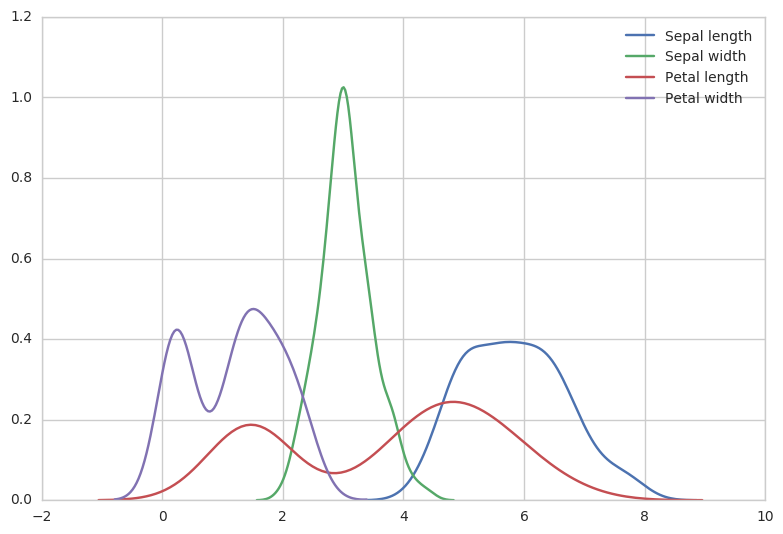

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set(color_codes=True)
warnings.filterwarnings('ignore') #ignore VisibleDeprecationWarning caused by stats model(Seaborn issue #953)


def plot(x1,x2,x3,x4):
    """Plot four histograms on a same plots"""
    sns.set_style("whitegrid")
    
    sns.distplot(x1,hist=False,label='Sepal length')
    sns.distplot(x2,hist=False,label='Sepal width')
    sns.distplot(x3,hist=False,label='Petal length')
    sns.distplot(x4,hist=False,label='Petal width')
    
    plt.legend(loc='upper right')
    
    plt.xlabel('')
    plt.tight_layout()
    plt.show()
    

plot(iris['Sepal length'],iris['Sepal width'],iris['Petal length'],iris['Petal width'])

##Standardization
The result of standardization is that the features will be rescaled so that they'll have mean of 0 and standard deviation, which are the properties of a standard normal distribution (in fact, we're [studentizing](https://en.wikipedia.org/wiki/Studentized_range), because we're dividing by an estimate of the standard deviation of the population).

It's calculated as:
$$z = \dfrac{x - \mu}{\sigma}$$

scikit-learn provides a function 'normalize', which enables a quick and easy way to perform this operation on array-like dataset.

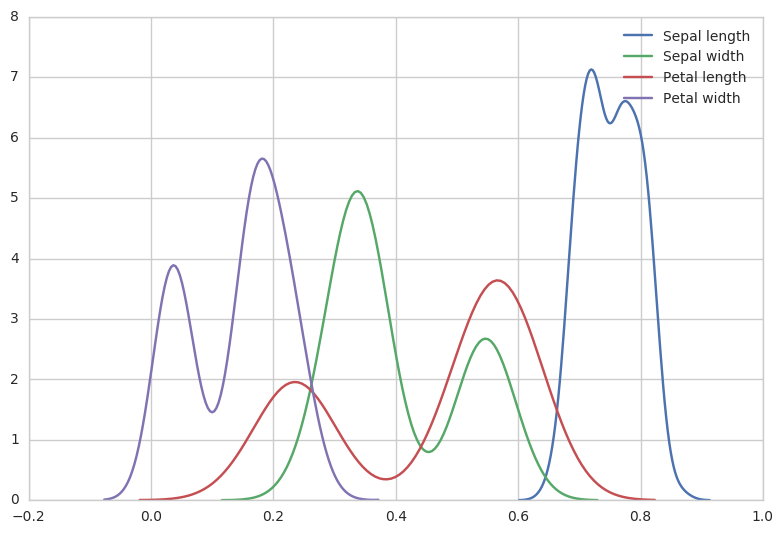

In [58]:
# Standardization
from sklearn import preprocessing

normalizer = preprocessing.Normalizer().fit(iris) #produce a utility class Normalizer. 
std_iris = normalizer.transform(iris) #output is an array

#transform array to DataFrame for plotting
std_iris = pd.DataFrame(std_iris,
                       columns=['Sepal length', 'Sepal width', 'Petal length','Petal width'])
#plot the new distribution
plot(std_iris['Sepal length'],std_iris['Sepal width'],std_iris['Petal length'],std_iris['Petal width'])

Notice that all features have been rescaled to the range of unit normal distribution.

In [83]:
print('Mean after standardization:\nSepal length={:.2f}, Sepal width={:.2f},Petal length = {:.2f},Petal width = {:.2f}'.
      format(std_iris.iloc[:,0].mean(), std_iris.iloc[:,1].mean(),std_iris.iloc[:,2].mean(),std_iris.iloc[:,3].mean()))
print()
print('Standard deviation after standardization:\nSepal length={:.2f}, Sepal width={:.2f},Petal length = {:.2f},Petal width = {:.2f}'.
      format(std_iris.iloc[:,0].std(), std_iris.iloc[:,1].std(),std_iris.iloc[:,2].std(),std_iris.iloc[:,3].std()))

Mean after standardization:
Sepal length=0.75, Sepal width=0.40,Petal length = 0.45,Petal width = 0.14

Standard deviation after standardization:
Sepal length=0.04, Sepal width=0.11,Petal length = 0.16,Petal width = 0.08


##Normalization
Normalization is usually achieved by Min-Max scaling, which rescales features within the range [0, 1].

The benefits to use this scaling include:
 * robustness to very small standard deviations of features.
 * preserving zero entries in sparse data.
 

It's calculated as:
$$ x_{norm} = \dfrac{x - x_{min}}{x_{max}- x_{min}} $$

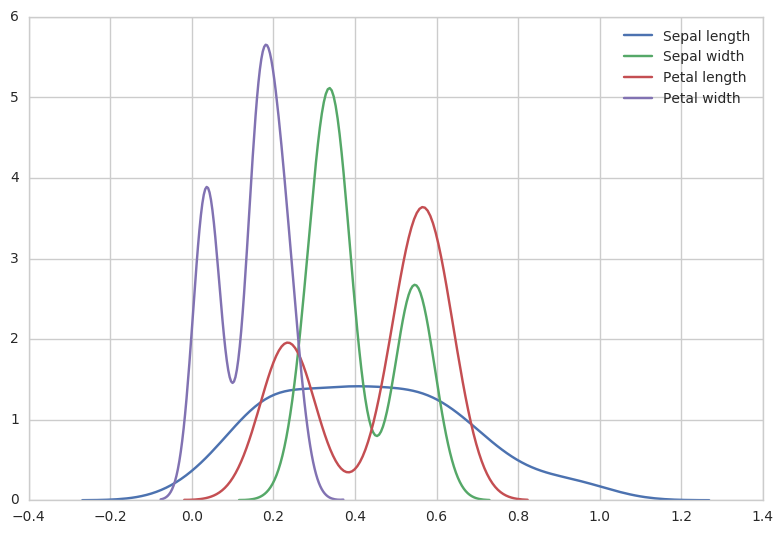

In [87]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(iris) #produce a utility class MinMaxScaler. 

minmax_iris = minmax_scaler.transform(iris) #output is an array

#transform array to DataFrame for plotting
minmax_iris = pd.DataFrame(minmax_iris,
                       columns=['Sepal length', 'Sepal width', 'Petal length','Petal width'])

#plot the new distribution
plot(minmax_iris['Sepal length'],std_iris['Sepal width'],std_iris['Petal length'],std_iris['Petal width'])

In [88]:
print('Mean after normalization:\nSepal length={:.2f}, Sepal width={:.2f},Petal length = {:.2f},Petal width = {:.2f}'.
      format(minmax_iris.iloc[:,0].mean(), minmax_iris.iloc[:,1].mean(),minmax_iris.iloc[:,2].mean(),minmax_iris.iloc[:,3].mean()))
print()
print('Standard normalization after standardization:\nSepal length={:.2f}, Sepal width={:.2f},Petal length = {:.2f},Petal width = {:.2f}'.
      format(minmax_iris.iloc[:,0].std(), minmax_iris.iloc[:,1].std(),minmax_iris.iloc[:,2].std(),minmax_iris.iloc[:,3].std()))

Mean after normalization:
Sepal length=0.43, Sepal width=0.44,Petal length = 0.47,Petal width = 0.46

Standard normalization after standardization:
Sepal length=0.23, Sepal width=0.18,Petal length = 0.30,Petal width = 0.32


##Standardization or Normalization?

Whether to use Standardization or Normalization really depends on the task.

To quote from Sebastian Raschka:
```
For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance.

However, this doesn't mean that Min-Max scaling is not useful at all. A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.
```

##Further Thoughts on Transformation
Coming from a statistics backgroud, I was quite amazed that how little variable transformation (like power transformation) was mentioned in machine learning. For example, I rarely hear about taking the log transformation of target variable. 

As a matter of fact, the book *Applied Predictive Modeling* by Kuhn and Johnson is a highly-regarded practical machine learning book with a large section on variable transformation including Box-Cox. The authors claim that many machine learning algorithms work better if the features have symmetric and unimodal distributions. For example,if a feature's distribution has a long tail, apply Box-Cox transformation (or tak log if the feature is positive) to correct skewness can save a lot of effort later on handling unbalanced class.


More discussions on this point can be found:

https://www.researchgate.net/post/Why_do_we_do_transformation_before_data_analysis

https://www.quora.com/When-is-it-good-to-do-feature-transformation